In [1]:
#importing required packages

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
#forming a dataframe
df = dataset['train'].to_pandas()


#data cleanup converting date column to date timetype from string type.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

/opt/anaconda3/envs/python_course/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1,1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12,12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10,10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10,10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2,2


In [11]:
df_DA_explode=df_DA.explode('job_skills')
df_DA_pivot=df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)


#sort table as per skill count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot =df_DA_pivot[ df_DA_pivot.loc['Total'].sort_values(ascending = False).index]
df_DA_pivot = df_DA_pivot.drop('Total')


#Set Index as job posted month
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns = 'job_posted_month_no')

In [21]:
df_DA_explode

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


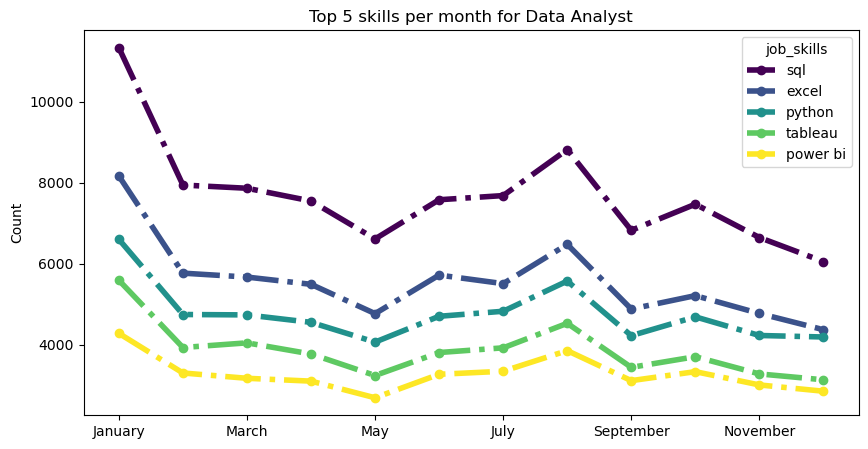

In [14]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth = 4,
    linestyle = '-.',
    colormap = 'viridis',
    marker = 'o',
    figsize = (10,5)
    )

plt.title('Top 5 skills per month for Data Analyst')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [18]:
df_DA_explode = df_DA_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)
df_DA_explode = df_DA_explode.sort_values(by='skill_count', ascending=False).head(20)
df_DA_explode

KeyError: "Column(s) ['job_skills', 'salary_year_avg'] do not exist"

In [16]:
from adjustText import adjust_text


In [1]:
texts=[]

for i, txt in enumerate(df_DA_explode.index):
    texts.append(plt.text(df_DA_explode['skill_count'].iloc[i], df_DA_explode['median_salary'].iloc[i], txt))

print(texts)
adjust_text(text)
df_DA_explode.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Job Count for top 10 skills')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary')
plt.tight_layout()


plt.show()

NameError: name 'df_DA_explode' is not defined